In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

In [2]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도:{:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.937


In [3]:
#결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있습니다 그래서 
#가지치기하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 않습니다.
#max_depth=4옵션을 주면 연속된 질문을 최대 4개로 제한합니다. 
#트리 깊이를 제한하면 과대적합이 줄어듭니다. 이는 훈련 세트의 정확도를 떨어뜨리지만
#테스트 세트의 성능은 개선시킵니다.

In [4]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도:{:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.951


### 결정 트리 분석

In [5]:
!pip install graphviz
#트리 모듈의 export_graphbiz함수를 이용해 트리를 시각화

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["악성","양성"],
               feature_names=cancer.feature_names,impurity=False,filled=True)

In [7]:
# import graphviz
# with open("tree.dot") as f:
#      dot_graph = f.read()
# display(graphviz.Source(dot_graph))

C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50501 missing from

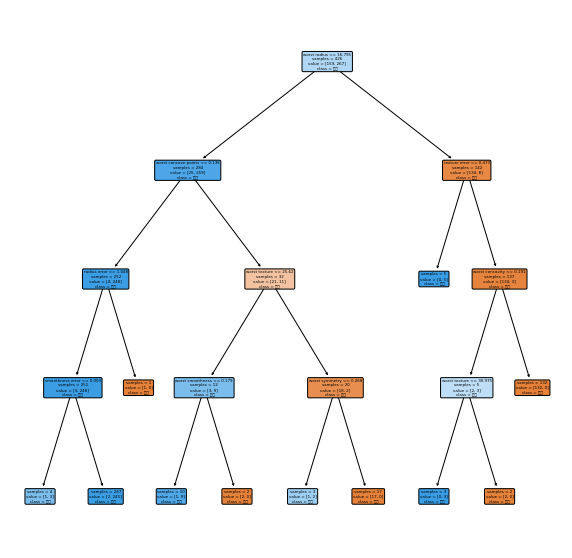

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(tree, class_names=["악성","양성"],feature_names=cancer.feature_names,
         impurity=False,filled=True,rounded=True,fontsize=4)
plt.show()

### 트리의 특성 중요도

In [9]:
#특성중요도-트리를 만드는 결정에 각 특성이 얼마나 중요한지 평가
#0-전혀 사용되지 않았다는 뜻
#1-완변하게 타깃 클래스를 예측했다는 뜻
#특성중요도의 전체 합은 1
print("특성 중요도:\n",tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [10]:
import numpy as np

C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51473 missing fr

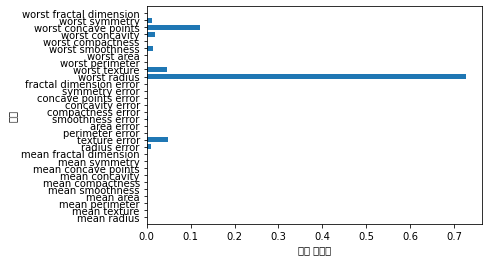

In [11]:
#시각화
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    #plt.barh가로막대그리는 함수
    #y축,x축
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
   #ytics(ticks,labels,size,rotiation)
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)

plot_feature_importances_cancer(tree)

In [12]:
#'worst radius'가 가장 중요한 특성으로 나타납니다.
#특성 중요도는 항상 양수이며 특서잉 어떤 클래스를 지지하는지는 알 수 없습니다.
#특성 중요도의 값은'worst radius'가 중요하다고 알려주지만 높은 반지름이 양성을 읨하는지 악성을 의미하는지는 알 수 없습니다.

Feature importances: [0. 1.]


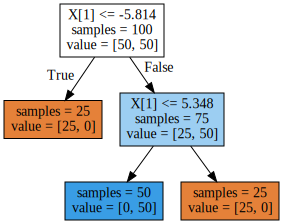

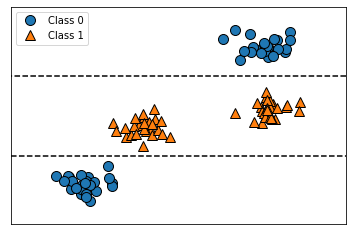

In [13]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

In [14]:
#y축의 특성이 클래스 레이블과 복합적인 관꼐를 가지고 있는 2차원 데이터셋과 결정트리가 만든 결정 경계

Text(0, 0.5, '가격 ($/Mbyte)')

C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44201 missing from

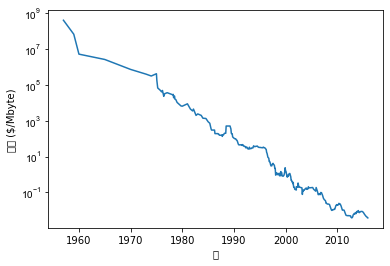

In [15]:
#컴퓨터 메모리 가격 동향 데이터셋
#x축은 날짜, y축은 해당 년도의 램(RAM)1메가바이트당 가격입니다.
import os
import numpy as np
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]

#가격 예측을 위해 날짜 특성만을 이용합니다.
#to_numpy()-DataFrame을 numpy배열형식으로 변환
#np.newaxis-numpy array의 차원을 늘려준다.
X_train= data_train.date.to_numpy()[:,np.newaxis]
#데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

#예측은 전체 기간에 대해서 수행합니다.
X_all=ram_prices.date.to_numpy()[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

#예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SM2127\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53580 missing 

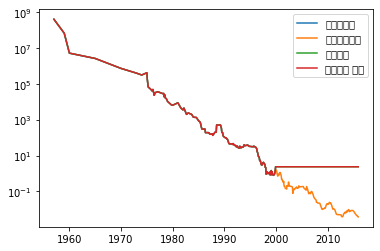

In [17]:
#실제값과 결정 트리,선형 회귀의 예측값을 비교한 것입니다.
plt.semilogy(data_train.date,data_train.price,label="훈련데이터")
plt.semilogy(data_test.date,data_test.price,label="테스트데이터")
plt.semilogy(ram_prices.date,price_tree,label="트리예측")
plt.semilogy(ram_prices.date,price_tree,label="선형회귀 예측")
plt.legend()